In [17]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [18]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame

df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [19]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]
ynames = ["healthy_loan", "high_risk_loan"]

# Separate the X variable, the features
x = df.drop("loan_status", axis=1)
xnames = x.columns

In [20]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [21]:
# Review the X variable DataFrame
x.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [22]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [33]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [24]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

A = LogisticRegression(random_state=1)

# Fit the model using training data
model = A.fit(X_train,y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [28]:
# Make a prediction using the testing data
prediction = A.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [32]:
#import bas

from sklearn.metrics import balanced_accuracy_score

# Print the balanced_accuracy score of the model
bas = balanced_accuracy_score(y_test,prediction)
print(f'The balanced accuracy score is {bas}')

The balanced accuracy score is 0.9520479254722232


In [34]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction)
cm

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [35]:
#import classification report 

from sklearn.metrics import classification_report

# Print the classification report for the model

cr = classification_report(y_test,prediction)

print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Healthy loan has a very high precision and recall with an F1-score of 1. Wheras high - risk loans the models predicition is moderate- modertately high. With a decreased precision while maintaining a moderately high recall. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [68]:
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

<AxesSubplot:>

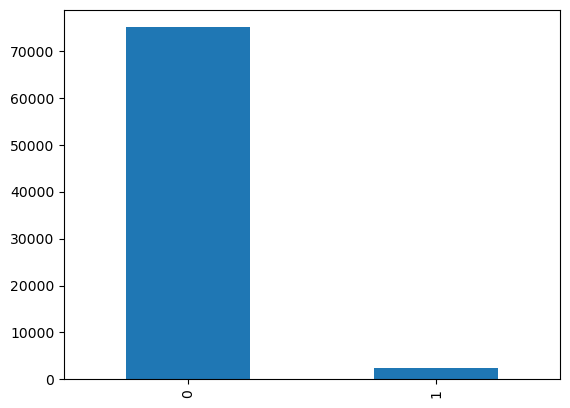

In [36]:
y.value_counts().plot.bar()

In [41]:
#install if needed
# ! pip install -U imbalanced-learn

In [42]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model

ros = RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(x, y)

# Fit the original training data to the random_oversampler model
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=1)

In [43]:
# Count the distinct values of the resampled labels data
y_res.value_counts()

0    75036
1    75036
Name: loan_status, dtype: int64

<AxesSubplot:>

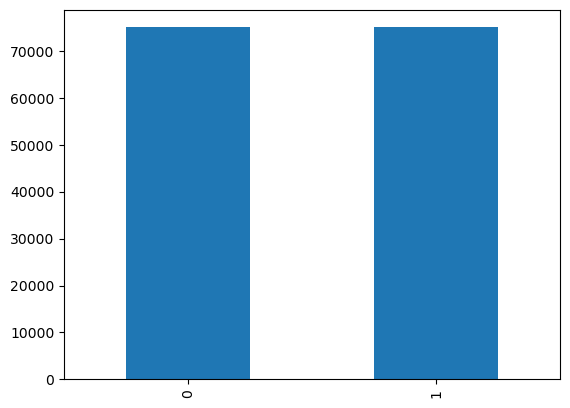

In [44]:
#Visualization of above 
y_res.value_counts().plot.bar()

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [46]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

A = LogisticRegression(random_state=1)

# Fit the model using training data
model = A.fit(X_train,y_train)
model

# Make a prediction using the testing data
prediction1 = A.predict(X_test)
prediction1

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [48]:
# Print the balanced_accuracy score of the model 
# Print the balanced_accuracy score of the model
bas1 = balanced_accuracy_score(y_test,prediction1)
print(f'The new balanced accuracy score is {bas1}')

The new balanced accuracy score is 0.9950160462226244


In [49]:
# Generate a confusion matrix for the model

cm1 = confusion_matrix(y_test,prediction1)
cm1

array([[18810,    95],
       [   92, 18521]], dtype=int64)

In [50]:
#Classiciation report

cr1 = classification_report(y_test,prediction1)

print(cr1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18905
           1       0.99      1.00      0.99     18613

    accuracy                           1.00     37518
   macro avg       1.00      1.00      1.00     37518
weighted avg       1.00      1.00      1.00     37518



In [67]:
print("Classification Report")

print(cr) 

print("_"*74)

print("Classification Report W/ Over Sampled Data")

print(cr1)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

__________________________________________________________________________
Classification Report W/ Over Sampled Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18905
           1       0.99      1.00      0.99     18613

    accuracy                           1.00     37518
   macro avg       1.00      1.00      1.00     37518
weighted avg       1.00      1.00      1.00     37518



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Comparable to initial regression model, the model with oversampled data is much better with providing increased precision and recal with the high risk loans. The precision with these loans went up 14% and the recal went up 9%!